<a href="https://colab.research.google.com/github/alaeddinehamroun/Time-Series-Forecasting/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating and plotting synthetic data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Plot Utilities

In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
  """
  Visualizes time series data

  Args:
    time (array of int) - contains the time steps
    series (array of int) - contains the measurements for each time step
    format - line style when plotting the graph
    label - tag for the line
    start - first time step to plot
    end - last time step to plot 
  """

  # Setup dimensions of the graph figure
  plt.figure(figsize=(10, 6))

  if type(series) is tuple:
    for series_num in series:
      # Plot the time series data
      plt.plot(time[start:end], series_num[start:end], format)

  else:
    # Plot the time series data
    plt.plot(time[start:end], series[start:end], format)
  
  # Label the x-axis
  plt.xlabel("Time")

  # Label the y-axis
  plt.ylabel("Value")

  # Overlay a gird on the graph
  plt.grid(True)

  # Draw the graph on screen
  plt.show()

### Trend

The trend describes the general tendency of the values to go up or down as time progresses. Given a certain time period, you can see if the graph is following an upward/positive trend, downward/negative trend, or just flat. For instance, the housing prices in a good location can see a general increase in valuation as time passes.

In [3]:
def trend(time, slope=0):
  """
  Generates synthetic data that follows a straight line given a slope value.

  Args:
    time (array of int) - contains the time steps
    slope (float) - determines the direction and steepness of the line

  Returns:
    series (array of float) - measurements that follow a straight line
  """

  # Compute the linear series given the slope
  series = slope * time

  return series

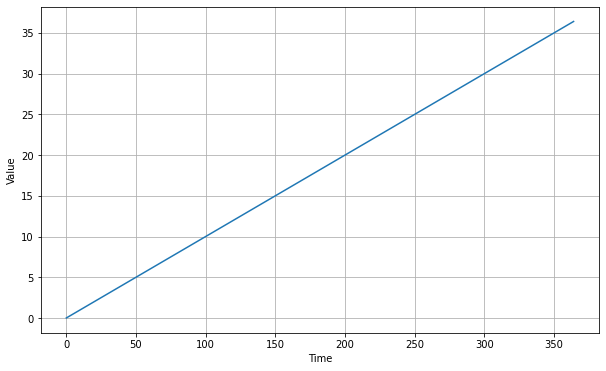

In [4]:
# Generate time steps. Assume 1 per day for one year (365 days)
time = np.arange(365)

# Define the slope (You can revise this)
slope = 0.1

# Generate measurements with the defined slope
series = trend(time, slope)

# Plot the results
plot_series(time, series, label=[f'slope={slope}'])

### Seasonality

This refers to a recurring pattern at regular time intervals. For instance, the hourly temperature might oscillate similarly for 10 consecutive days and you can use that to predict the behavior on the next day.

In [5]:
def seasonal_pattern(season_time):
  """
  Just an arbitrary pattern, you can change it if you wish

  Args:
    season_time (array of float) - contains the measurements per time step
  
  Returns:
    data_pattern (array of float) - contains revised measurement values according 
    to the defined pattern
  """

  # Generate the values using an arbitrary pattern
  #     numpy.where
  #     numpy.where(condition, [x, y, ]/)
  #     Return elements chosen from x or y depending on condition.
  data_pattern = np.where(season_time < 0.4,
                          np.cos(season_time * 2 * np.pi),
                          1 / np.exp(3 * season_time))
  return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
  """
  Repeats the same pattern at each period

  Args:
    time (array of int) - contains the time steps
    period (int) - number of time steps before the pattern repeats
    amplitude (int) - peak measured value in a period
    phase (int) - number of time steps to shift the measured values

  Returns:
    data_pattern (array of float) - seasonal data scaled by the defined amplitude
  """

  # Define the measured values per period
  season_time = ((time + phase) % period) / period
  
  # Generates the seasonal data scaled by the defined amplitude
  data_pattern = amplitude * seasonal_pattern(season_time)

  return data_pattern

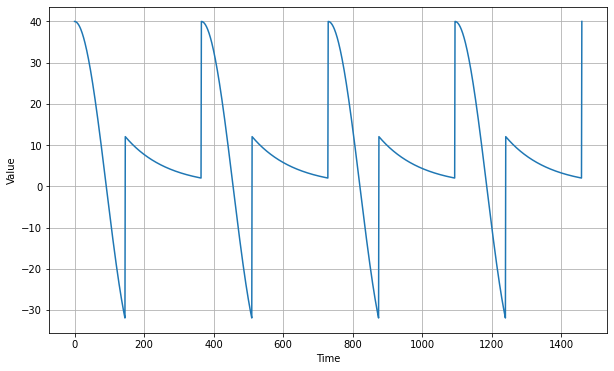

In [6]:
# Generate time steps
time = np.arange(4 * 365 + 1)

# Define the parameters of the seasonal data
period = 365
amplitude = 40

# Generate the seasonal data
series = seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

The example below demonstrates a seasonal pattern with an upward trend:

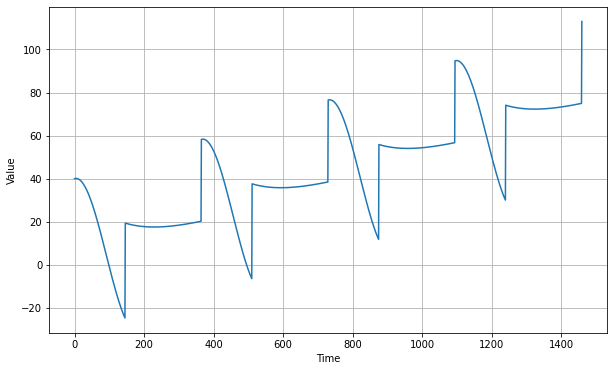

In [7]:
# Define seasonal parameters
slope = 0.05
period = 365
amplitude = 40

# Generate the data
series = trend(time, slope) + seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

### Noise

In practice, few real-life time series have such a smooth signal. They usually have some noise riding over that signal. The next cells will show what a noisy signal looks like:

In [8]:
def noise(time, noise_level=1, seed=None):
  """
  Generates a normally distributed noisy signal

  Args:
    time (array of int) - contains the time steps
    noise_level (float) - scaling factor for the generated signal
    seed (int) - number generator seed for repeatability

  Returns:
    noise (array of float) - the noisy signal
  """

  # Initialize the random number generator
  rnd = np.random.RandomState(seed)

  # Generate a random number for each time step and scale by the noise level
  noise = rnd.randn(len(time)) * noise_level

  return noise

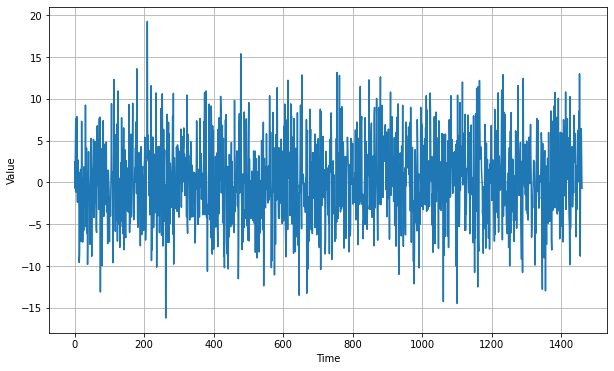

In [9]:
# Define noise level
noise_level = 5

# Generate noisy signal
noise_signal = noise(time, noise_level=noise_level, seed=42)

# Plot the results
plot_series(time, noise_signal)

Adding this to the time series we generated earlier:

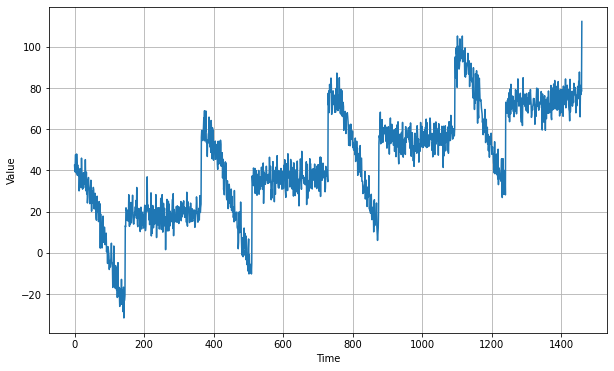

In [10]:
# Add the noise to the time series
series += noise_signal

# Plot the results
plot_series(time, series)

### Autocorrelation

Time series can also be autocorrelated. This means that measurements at a given time step is a function of previous time steps.

In [11]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Initialize array of random numbers equal to the length 
    # of the given time steps plus an additional step
    ar = rnd.randn(len(time) + 1)

    # Define scaling factor
    phi = 0.8

    # Autocorrelate element 11 onwards with the measurement at 
    # (t-1), where t is the current time step
    for step in range(1, len(time) + 1):
        ar[step] += phi * ar[step - 1]
    
    # Get the autocorrelated data and scale with the given amplitude.
    ar = ar[1:] * amplitude
    
    return ar

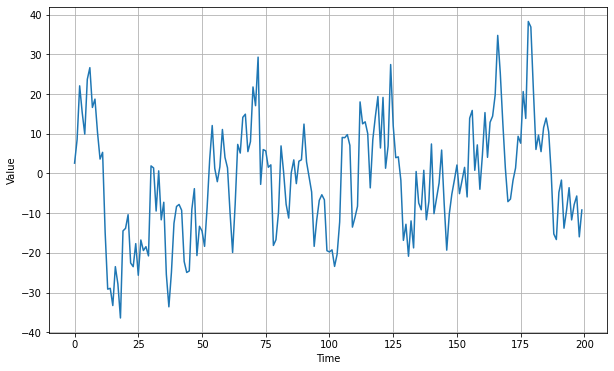

In [12]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the results
plot_series(time[:200], series[:200])

Another autocorrelated time seris you might encounter is one where it decays predictably after random spikes:

In [13]:
def impulses(time, num_impulses, amplitude=1, seed=None):
  """
  Generates random impulses

  Args:
    time (array of int) - contains the time steps
    num_impulses (int) - number of impulses to generate
    amplitude (float) - scaling factor
    seed (int) - number generator seed for repeatability

    Returns:
      series (array of float) - array containing the impulses
  """

  # Initialize random number generator 
  rnd = np.random.RandomState(seed)

  # Generate random numbers
  impulse_indices = rnd.randint(len(time), size=num_impulses)

  # Initialize series
  series = np.zeros(len(time))

  # Insert random impulses
  for index in impulse_indices:
    series[index] += rnd.rand() * amplitude

  return series    

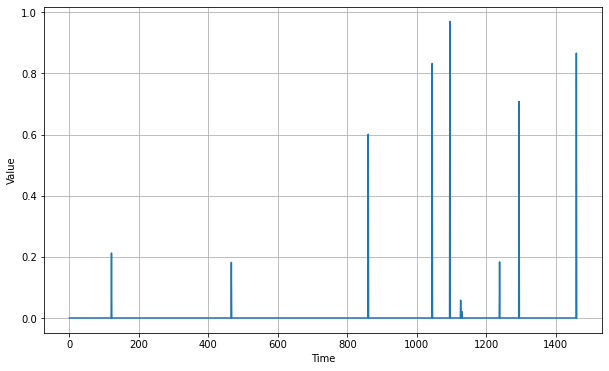

In [14]:
# Generate random impulses
impulses_signal = impulses(time, num_impulses=10, seed=42)

# Plot the results
plot_series(time, impulses_signal)

In [15]:
def autocorrelation_impulses(source, phis):
    """
    Generates autocorrelated data from impulses

    Args:
      source (array of float) - contains the time steps with impulses
      phis (dict) - dictionary containing the lag time and decay rates

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Copy the source
    ar = source.copy()

    # Compute new series values based on the lag times and decay rates
    for step, value in enumerate(source):
        for lag, phi in phis.items():
            if step - lag > 0:
              ar[step] += phi * ar[step - lag]

    return ar

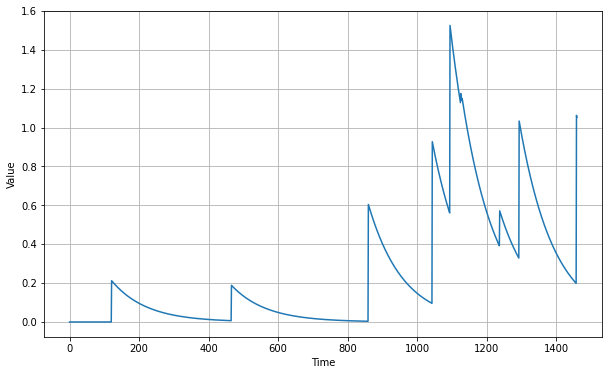

In [16]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.99})

# Plot the results
plot_series(time, series)

Here is another example where the nest values are computed from those in t-1 and t-50:

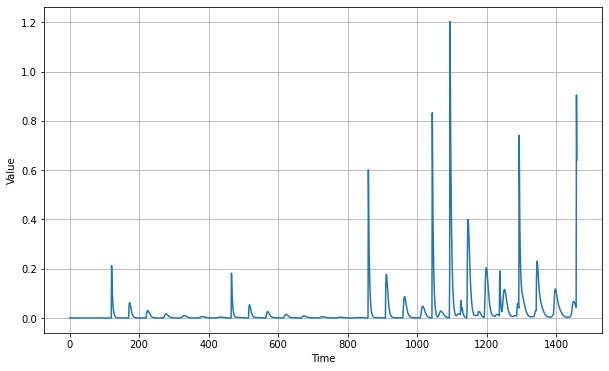

In [17]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.70, 50: 0.2})

# Plot the results
plot_series(time, series)

Autocorrelated data can also ride a trend line:

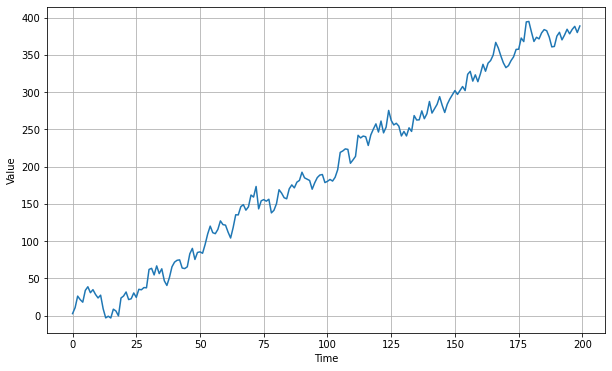

In [18]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

Similarly, seasonality can also be added to this data:

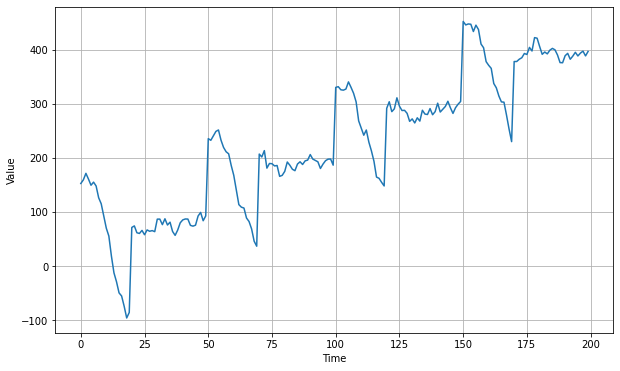

In [19]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])


### Non-stationary time series

It is also possible for the time series to break an expected pattern.

A time series whose statistical properties change over time is called a non-stationary time series. Thus a time series with a trend or seasonality is non-stationary in nature. This is because the presence of trend or seasonality will affect the mean, variance and other properties at any given point in time.

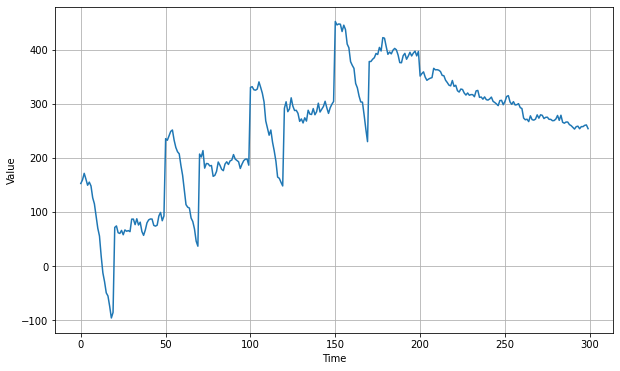

In [20]:
# Generate data with positive trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Generate data with negative trend
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550

# Splice the downward trending data into the first one at time step = 200
series[200:] = series2[200:]

# Plot the result
plot_series(time[:300], series[:300])

### Generate the synthetic data


The synthetic data will start at a baseline trend upwards with a seasonal pattern every 365 steps and some noise because real world data is often niosy as well.

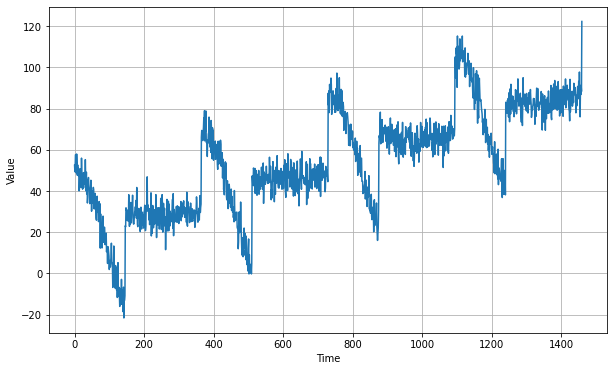

In [21]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

### Split the Dataset

In [22]:
# Define the split time
split_time = 1000

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

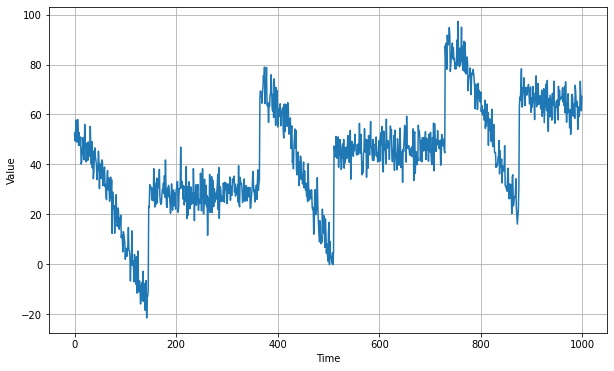

In [23]:
# Plot the train set
plot_series(time_train, x_train)

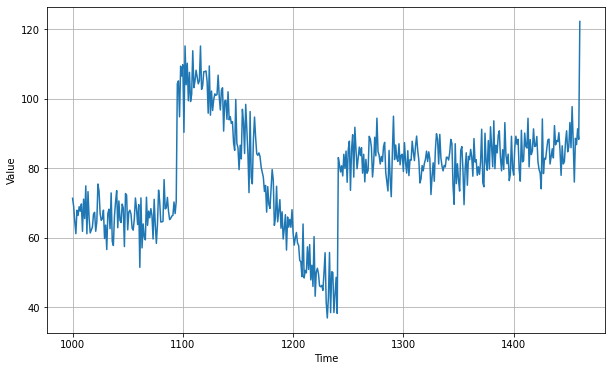

In [24]:
# Plot the validation set
plot_series(time_valid, x_valid)

# Statistical Forecasting on Synthetic Data

### Naive Forecast

Naive forecast: assume that the next value will be the same as the previous time step.

In [25]:
# Generate the naive forecast
naive_forecast = series[split_time - 1:-1]

# Define time step
time_step = 100

# Print values
print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')

ground truth at time step 100: 109.84197998046875
prediction at time step 101: 109.84197998046875


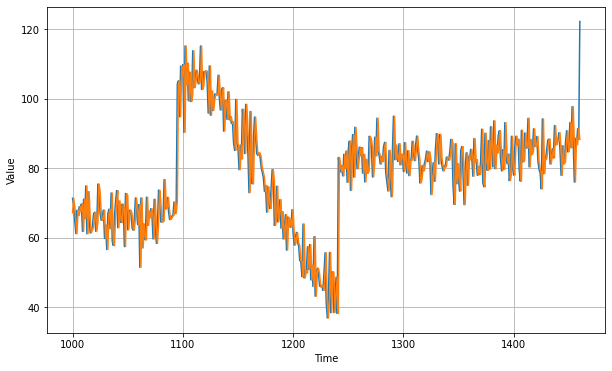

In [26]:
# Plot the results
plot_series(time_valid, (x_valid, naive_forecast))

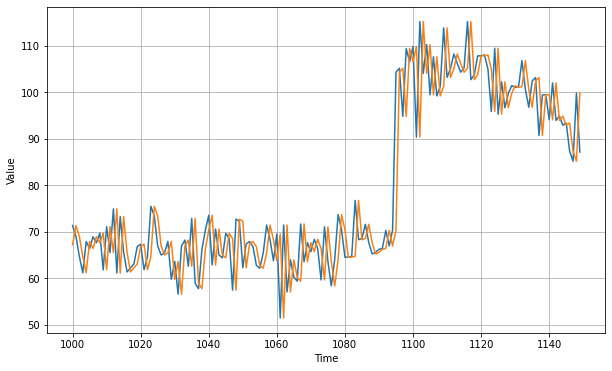

In [27]:
# Zooming in at the start of the validation period 
plot_series(time_valid, (x_valid, naive_forecast), start=0, end=150)

In [28]:
# Computing Metrics
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827534
5.937908


These values above will be the baseline.

### Moving Average
Moving Average: Sums  up a series of time steps and the average will be the prediction for the next time step.

For example, the average of the measurements at time steps 1 to 10 will be the forecast for time step 11, then the average for time steps 2 to 11 will be the forecast for time step 12, and so on.

In [29]:
def moving_average_forecast(series, window_size):
  """
  Generates a moving average forecast

  Args:
    series (array of float) - contains the values of the time series
    window_size (int) - the number of time steps to compute the average for
  
  Returns:
    forecast (array of float) - the moving average forecast
  """

  # Initialize a list 
  forecast = []

  # Compute the moving average based on the window size
  for time in range(len(series) - window_size):
    forecast.append(series[time: time + window_size].mean())
  
  # Convert to a numpy array
  forecast = np.array(forecast)

  return forecast

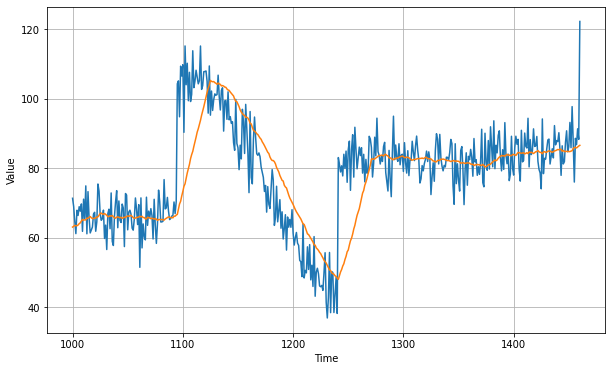

In [30]:
# Generate the moving average forecast with a window size of 30
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))

In [31]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

106.674576
7.142419


That's worse than naive forecast! The moving average does not anticipate trend or seasonality. In particular, those huge spikes in the original series causes big deviations as shown in the plot above.

### Differencing

Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

Here, since the seasonality period is 365 days, we will subtract the value at time t-365 from the value at time t. 
In addition, we will need to align the result with the time array. Since you can only do time differencing for t>=365, you will need to truncate the first 365 time steps of the time array.

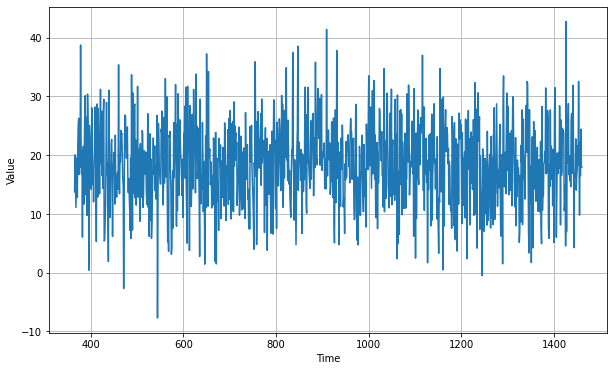

In [32]:
# Subtract the values at t-365 from the original series
diff_series = (series[365:] - series[:-365])

# Truncate the first 365 time steps
diff_time = time[365:]

# Plot the results
plot_series(diff_time, diff_series)

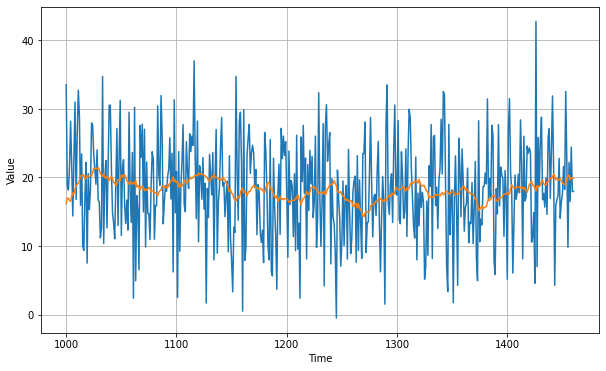

In [33]:
# Generate moving average from the time differenced dataset
diff_moving_avg = moving_average_forecast(diff_series, 30)

# Slice the prediction points that corresponds to the validation set time steps
diff_moving_avg = diff_moving_avg[split_time - 365 - 30:]

# Slice the ground truth points that corresponds to the validation set time steps
diff_series = diff_series[split_time - 365:]

# Plot the results
plot_series(time_valid, (diff_series, diff_moving_avg))

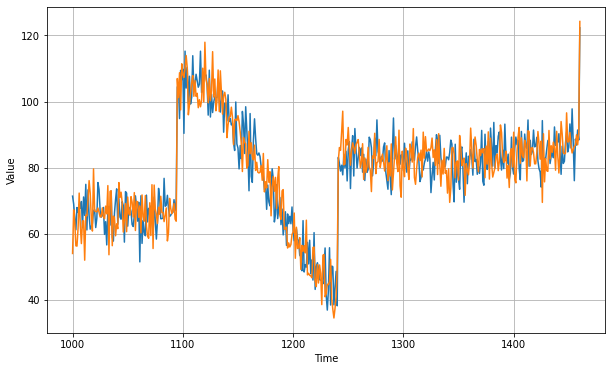

In [34]:
# Add the trend and seasonality from the original series
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [35]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

53.764587
5.9032416


It is a bit better than naive forecast. However, the forecasts look a bit too random because you're adding past values which are already noisy. Remember that the time differenced signal is also noisy so adding these raw past values can compound this problem. To remedy that, you can use a moving averaging on past values to smooth out some of this noise.

### Smoothing

There are two ways to smooth out past values before adding them back to the time differenced moving average:
  * Trailing windows - This refers to getting the mean of past values to smooth out the value at the current time step. For example, getting the average of t=0 to t=6 to get the smoothed data point at t=6.
  * Centered windows - This refers to getting the mean of past and future values to smooth out the value at the current time step. For example, getting the average of t=0 to t=6 to get the smoothed data point at t=3.


We will use the centered windows approad: The series array is shifted by 370 steps and the window size is 11. To get the smooth data point at t=1000 (i.e. start of the validation set), it will average the measurements at t=995 to t=1005.

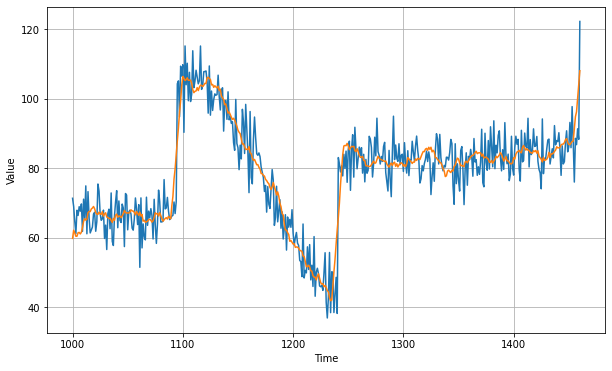

In [36]:
# Smooth the original series before adding the time differenced moving average
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-359], 11) + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))

In [37]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

34.315723
4.6053295


# Preparing Features and Labels

In [38]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [39]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  """
  Generates dataset windows

  Args:
    series (array of float) - contains the values of the time series
    window_size (int) - the number of time steps to include in the feature
    batch_size (int) - the batch size
    shuffle_buffer (int) - buffer size to use for the shuffle method
  
  Returns:
    dataset (TF Dataset) - TF dataset containing time windows
  """

  # Generate a TF Dataset from the series values
  dataset = tf.data.Dataset.from_tensor_slices(series)

  # Window the data but only take those with the specified size
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

  # Flatten the windows by putting its elements in a single batch
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

  # Create tuples with features and labels
  dataset = dataset.map(lambda window: (window[:-1], window[-1]))

  # Shuffle the windows
  dataset = dataset.shuffle(shuffle_buffer)

  # Create batches of windows
  dataset = dataset.batch(batch_size).prefetch(1)

  return dataset

In [40]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [41]:
# Print properties of a single batch
for windows in dataset.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 20)
shape of second element: (32,)


# Training a Single Layer Neural Network with Time Series Data

### Build and compile the model

In [ ]:
# Build the single layer neural network
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

# Print the initial layer weights
print("Layer weights: \n {} \n".format(l0.get_weights()))

# Print the model summary
model.summary()

Layer weights: 
 [array([[-0.51532054],
       [-0.18374044],
       [-0.47719318],
       [-0.13008052],
       [ 0.28518248],
       [ 0.13833863],
       [ 0.05960971],
       [ 0.4251637 ],
       [ 0.5185757 ],
       [ 0.3922034 ],
       [-0.3318504 ],
       [ 0.12046158],
       [-0.31138685],
       [-0.5029651 ],
       [ 0.23374933],
       [ 0.2085827 ],
       [ 0.17411721],
       [-0.46501347],
       [-0.11166975],
       [-0.2781682 ]], dtype=float32), array([0.], dtype=float32)] 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set the training parameters
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

### Train the model

In [ ]:
# Train the model
model.fit(dataset, epochs=100)

Epoch 1/100
31/31 [==============================] - 1s 10ms/step - loss: 1397.9319
Epoch 2/100
31/31 [==============================] - 0s 853us/step - loss: 248.8363
Epoch 3/100
31/31 [==============================] - 0s 884us/step - loss: 193.9919
Epoch 4/100
31/31 [==============================] - 0s 861us/step - loss: 172.1800
Epoch 5/100
31/31 [==============================] - 0s 850us/step - loss: 154.7344
Epoch 6/100
31/31 [==============================] - 0s 887us/step - loss: 142.7701
Epoch 7/100
31/31 [==============================] - 0s 876us/step - loss: 132.8128
Epoch 8/100
31/31 [==============================] - 0s 982us/step - loss: 122.6649
Epoch 9/100
31/31 [==============================] - 0s 880us/step - loss: 116.4666
Epoch 10/100
31/31 [==============================] - 0s 906us/step - loss: 108.8369
Epoch 11/100
31/31 [==============================] - 0s 865us/step - loss: 103.6457
Epoch 12/100
31/31 [==============================] - 0s 977us/step - loss

In [ ]:
# Print the layer weights
print("Layer weights {}".format(l0.get_weights()))

Layer weights [array([[-0.02253969],
       [ 0.00752501],
       [ 0.03526628],
       [-0.07645875],
       [-0.00662803],
       [ 0.05064929],
       [ 0.01745114],
       [ 0.05241545],
       [-0.10720051],
       [ 0.00986054],
       [ 0.05702308],
       [-0.0448805 ],
       [ 0.01611177],
       [-0.05949123],
       [ 0.06234967],
       [ 0.13540265],
       [-0.00558424],
       [ 0.06698315],
       [ 0.2907202 ],
       [ 0.49123433]], dtype=float32), array([0.01247466], dtype=float32)]


### Model Prediction

In [ ]:
# Shape of the first 20 data points slice
print(f'shape of series[0:20]: {series[0:20].shape}')

# Shape after adding a batch dimension
#     numpy.newaxis
#     A convenient alias for None, useful for indexing arrays.
print(f'shape of series[0:20][np.newaxis]: {series[0:20][np.newaxis].shape}')

# Shape after adding a batch dimension (alternate way)
print(f'shape of series[0:20][np.newaxis]: {np.expand_dims(series[0:20], axis=0).shape}')

# Sample model prediction
print(f'model prediction: {model.predict(series[0:20][np.newaxis])}')

shape of series[0:20]: (20,)
shape of series[0:20][np.newaxis]: (1, 20)
shape of series[0:20][np.newaxis]: (1, 20)
1/1 [==============================] - 0s 46ms/step
model prediction: [[42.541283]]


In [ ]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

# Slice the points that are aligned with the validation set
forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

shape after converting to numpy array: (461, 1, 1)
shape after squeezing: (461,)


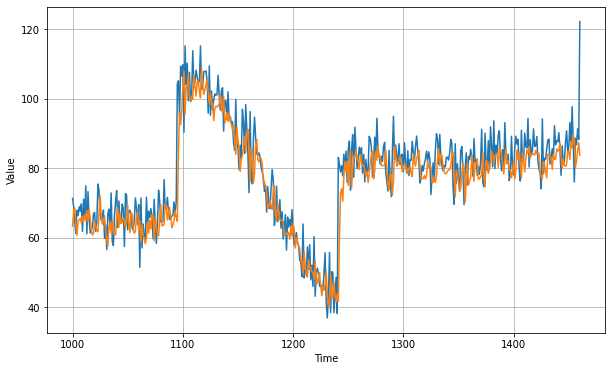

In [ ]:
# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

53.19402
5.3387065


# Training a Deep Neural Network with Time Series Data

### Build the model

In [ ]:
# Build the model
model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_baseline.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set the training parameters
model_baseline.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [ ]:
# Train the model
model_baseline.fit(dataset,epochs=100)

In [ ]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_baseline.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

43.77464
4.79683


### Tune the learning rate

In [ ]:
# Build the model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
  tf.keras.layers.Dense(10, activation="relu"), 
  tf.keras.layers.Dense(1)  
])

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
  lambda epoch: 1e-8 * 10**(epoch / 20))

In [ ]:
# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

In [ ]:
# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

(1e-08, 0.001, 0.0, 300.0)

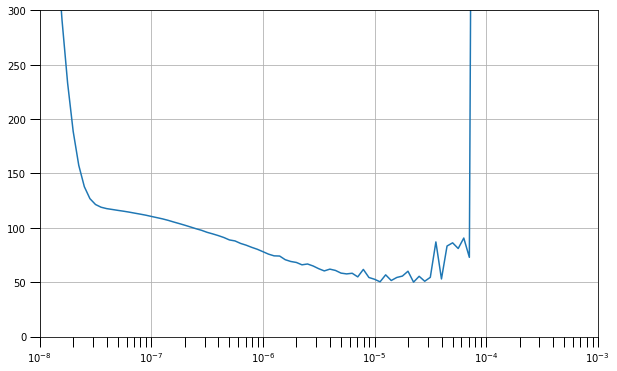

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 300])

### Train the Model

In [ ]:
# Build the model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

In [ ]:
# Set the optimizer with the tuned learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=4e-6, momentum=0.9)

In [ ]:
# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100)

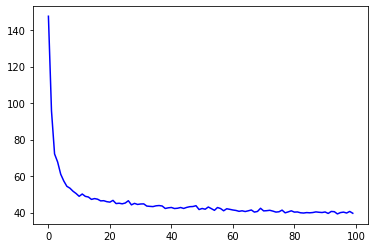

In [ ]:
# Plot the loss
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

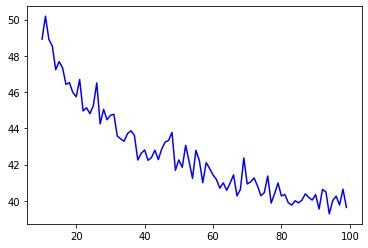

In [ ]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

In [ ]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_tune.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

44.151714
4.8483353


# Training a Simple RNN for forecasting

### Build the Model

SimleRNN layers expect a 3-dimensional tensor input with the shape [batch, timesteps, feature].

The first layer below defines a lambda function that adds a dimension at the last axis of the input.


SimpleRNN usees tanh by default as an activation function, and that has an output range of [-1, 1]. The last lambda() layer will scale the output by 100 before it  adjusts the layer weights. This will help the training by scaling up the output to around the same figures as your labels.

In [ ]:
# Build the Model
model_tune = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                           input_shape=[window_size]),
    tf.keras.layers.SimpleRNN(40, return_sequences=True),
    tf.keras.layers.SimpleRNN(40),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 20, 1)             0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 20, 40)            1680      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dense_10 (Dense)            (None, 1)                 41        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


### Tune the Learning Rate

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
  lambda epoch: 1e-8 * 10**(epoch / 20))

In [ ]:
# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
#       Using the Huber Loss as loss function to minimize sensitivity to outliers
model_tune.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

In [ ]:
# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 2s 11ms/step - loss: 28.8231 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 0s 10ms/step - loss: 27.3847 - lr: 1.1220e-08
Epoch 3/100
31/31 [==============================] - 0s 10ms/step - loss: 26.0412 - lr: 1.2589e-08
Epoch 4/100
31/31 [==============================] - 0s 10ms/step - loss: 24.9672 - lr: 1.4125e-08
Epoch 5/100
31/31 [==============================] - 0s 10ms/step - loss: 24.0362 - lr: 1.5849e-08
Epoch 6/100
31/31 [==============================] - 0s 10ms/step - loss: 23.1628 - lr: 1.7783e-08
Epoch 7/100
31/31 [==============================] - 0s 11ms/step - loss: 22.3222 - lr: 1.9953e-08
Epoch 8/100
31/31 [==============================] - 0s 10ms/step - loss: 21.5340 - lr: 2.2387e-08
Epoch 9/100
31/31 [==============================] - 0s 10ms/step - loss: 20.7774 - lr: 2.5119e-08
Epoch 10/100
31/31 [==============================] - 0s 10ms/step - loss: 20.0404 - lr: 2.8184e-08
Epoch 11/

(1e-08, 0.001, 0.0, 50.0)

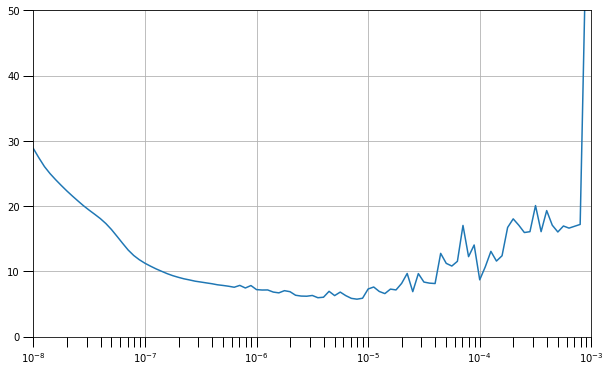

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 50])

(1e-07, 0.0001, 0.0, 20.0)

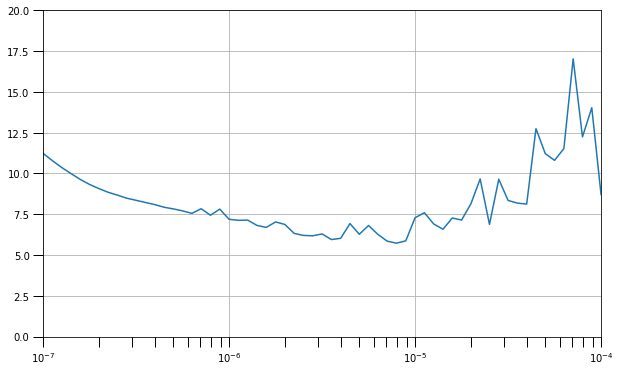

In [ ]:
#          Zooming in
# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-7, 1e-4, 0, 20])

### Train the Model

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 1e-6

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 3s 12ms/step - loss: 12.6858 - mae: 13.1784
Epoch 2/100
31/31 [==============================] - 0s 10ms/step - loss: 9.1242 - mae: 9.6116
Epoch 3/100
31/31 [==============================] - 0s 10ms/step - loss: 8.5067 - mae: 8.9884
Epoch 4/100
31/31 [==============================] - 0s 10ms/step - loss: 8.1408 - mae: 8.6277
Epoch 5/100
31/31 [==============================] - 0s 10ms/step - loss: 8.0819 - mae: 8.5642
Epoch 6/100
31/31 [==============================] - 0s 11ms/step - loss: 7.5023 - mae: 7.9840
Epoch 7/100
31/31 [==============================] - 0s 10ms/step - loss: 7.2676 - mae: 7.7512
Epoch 8/100
31/31 [==============================] - 0s 11ms/step - loss: 7.1776 - mae: 7.6612
Epoch 9/100
31/31 [==============================] - 0s 10ms/step - loss: 6.9169 - mae: 7.3984
Epoch 10/100
31/31 [==============================] - 0s 10ms/step - loss: 6.7736 - mae: 7.2554
Epoch 11/100
31/31 [===========================

1/1 [==============================] - 0s 21ms/step


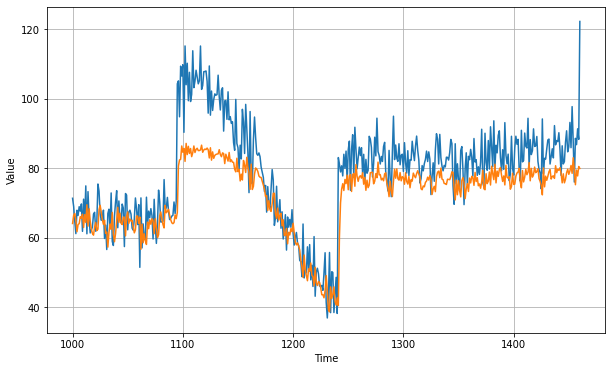

In [ ]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

103.27754
7.693403


You can optimize this step by leveraging Tensorflow models' capability to process batches. Instead of running the for-loop above which processes a single window at a time, you can pass in an entire batch of windows and let the model process that in parallel.

The function below does just that. It almost mirrors the windowed_dataset() function but it does not shuffle the windows. That's because we want the output to be in its proper sequence so we can compare it properly to the validation set.

In [ ]:
def model_forecast(model, series, window_size, batch_size):
  """
  Uses an input model to generate predictions on data windows

  Args:
    model (TF keras Model) - model that accepts data windows
    series (array of float) - contains the values of the time series
    window_size (int) - the number of time steps to include in the window
    batch_size (int) - the batch size

  Retuns:
    forecast (numpy array) - array containing predictions
  """

  # Generate a TF Dataset from the series values
  dataset = tf.data.Dataset.from_tensor_slices(series)

  # Window the data but only take those with the specified size
  dataset = dataset.window(window_size, shift=1, drop_remainder=True)

  # Flatten the windows by putting its elements in a single batch
  dataset = dataset.flat_map(lambda w: w.batch(window_size))

  # Create batches of windows
  dataset = dataset.batch(batch_size).prefetch(1)

  # Get predicitions on the entire dataset
  forecast = model.predict(dataset)

  return forecast

15/15 [==============================] - 0s 9ms/step


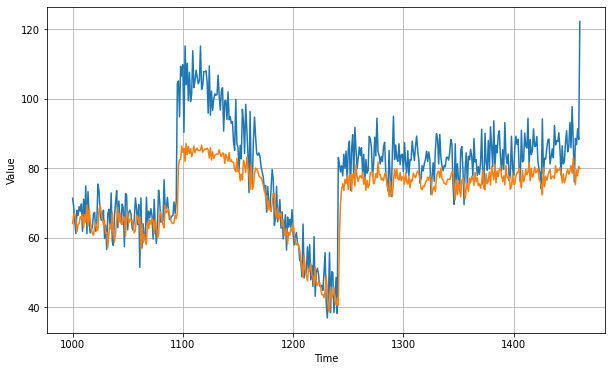

In [ ]:
# Reduce the original series 
#   Removing the last point when slicing the series: 1460 % 15 = 0
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

103.27758
7.693404


# Using a multi-layer LSTM for forecasting

### Build the Model

In [ ]:
# Build the Model
model_tune = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                           input_shape=[window_size]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 20, 1)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 20, 64)           8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
 lambda_5 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-trai

### Tune the Learning Rate

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 9s 32ms/step - loss: 27.1482 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 1s 31ms/step - loss: 21.3557 - lr: 1.1220e-08
Epoch 3/100
31/31 [==============================] - 1s 31ms/step - loss: 18.8921 - lr: 1.2589e-08
Epoch 4/100
31/31 [==============================] - 1s 30ms/step - loss: 17.2673 - lr: 1.4125e-08
Epoch 5/100
31/31 [==============================] - 1s 30ms/step - loss: 15.9864 - lr: 1.5849e-08
Epoch 6/100
31/31 [==============================] - 1s 31ms/step - loss: 15.0164 - lr: 1.7783e-08
Epoch 7/100
31/31 [==============================] - 1s 31ms/step - loss: 14.3257 - lr: 1.9953e-08
Epoch 8/100
31/31 [==============================] - 1s 32ms/step - loss: 13.8022 - lr: 2.2387e-08
Epoch 9/100
31/31 [==============================] - 1s 31ms/step - loss: 13.3663 - lr: 2.5119e-08
Epoch 10/100
31/31 [==============================] - 1s 32ms/step - loss: 12.9588 - lr: 2.8184e-08
Epoch 11/

(1e-08, 0.001, 0.0, 30.0)

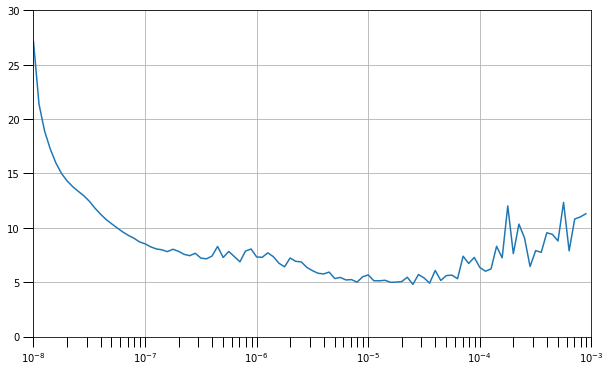

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 30])

### Train the Model

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 2e-6

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 9s 32ms/step - loss: 9.3910 - mae: 9.8758
Epoch 2/100
31/31 [==============================] - 1s 31ms/step - loss: 7.5588 - mae: 8.0374
Epoch 3/100
31/31 [==============================] - 1s 31ms/step - loss: 6.8367 - mae: 7.3160
Epoch 4/100
31/31 [==============================] - 1s 31ms/step - loss: 6.4921 - mae: 6.9692
Epoch 5/100
31/31 [==============================] - 1s 32ms/step - loss: 6.3457 - mae: 6.8242
Epoch 6/100
31/31 [==============================] - 1s 32ms/step - loss: 6.2038 - mae: 6.6841
Epoch 7/100
31/31 [==============================] - 1s 31ms/step - loss: 6.1012 - mae: 6.5836
Epoch 8/100
31/31 [==============================] - 1s 31ms/step - loss: 5.9876 - mae: 6.4667
Epoch 9/100
31/31 [==============================] - 1s 31ms/step - loss: 5.9279 - mae: 6.4134
Epoch 10/100
31/31 [==============================] - 1s 31ms/step - loss: 5.8625 - mae: 6.3419
Epoch 11/100
31/31 [=============================

### Model Prediction

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """
    Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    # Get predictions on the entire dataset
    forecast = model.predict(dataset)
    
    return forecast

15/15 [==============================] - 2s 14ms/step


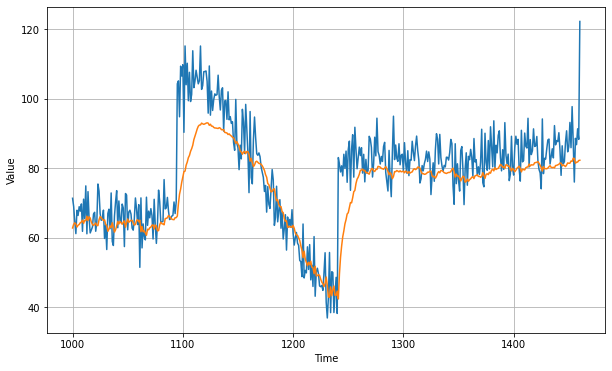

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

84.99243
6.583375


# Using Convolutions with LSTMs

### Prepare Features and Labels

In [42]:
# Parameters
window_size = 20
batch_size = 16
shuffle_buffer_size = 1000

In [43]:
# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

### Build the Model

In [44]:
# Reset states generated by keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                           strides=1,
                           padding="causal",
                           activation="relu",
                           input_shape=[window_size, 1]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 400)
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 20, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda (Lambda)             (None, 1)                 0         
                                                                 
Total params: 66,369
Trainable params: 66,369
Non-trainable params: 0
_________________________________________________________________


### Tune the Learning Rate

In [45]:
# Get initial weights
#     use the get_weights() method to reset it later
init_weights = model.get_weights()

In [46]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
62/62 [==============================] - 8s 55ms/step - loss: 73.2792 - lr: 1.0000e-08
Epoch 2/100
62/62 [==============================] - 3s 42ms/step - loss: 20.6374 - lr: 1.1220e-08
Epoch 3/100
62/62 [==============================] - 3s 46ms/step - loss: 14.1489 - lr: 1.2589e-08
Epoch 4/100
62/62 [==============================] - 3s 50ms/step - loss: 12.1450 - lr: 1.4125e-08
Epoch 5/100
62/62 [==============================] - 2s 24ms/step - loss: 10.5307 - lr: 1.5849e-08
Epoch 6/100
62/62 [==============================] - 3s 45ms/step - loss: 9.1626 - lr: 1.7783e-08
Epoch 7/100
62/62 [==============================] - 4s 55ms/step - loss: 8.1797 - lr: 1.9953e-08
Epoch 8/100
62/62 [==============================] - 2s 23ms/step - loss: 7.5634 - lr: 2.2387e-08
Epoch 9/100
62/62 [==============================] - 1s 22ms/step - loss: 7.1668 - lr: 2.5119e-08
Epoch 10/100
62/62 [==============================] - 2s 23ms/step - loss: 6.9429 - lr: 2.8184e-08
Epoch 11/100
6

(1e-08, 0.001, 0.0, 50.0)

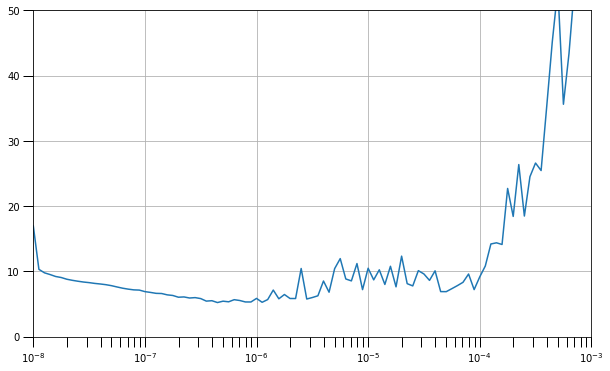

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 50])

### Train the Model

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

In [ ]:
# Set the learning rate
learning_rate = 1e-6

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
# Train the model
history = model.fit(train_set,epochs=100)

Epoch 1/100
62/62 [==============================] - 1s 14ms/step - loss: 4.5535 - mae: 5.0305
Epoch 2/100
62/62 [==============================] - 1s 13ms/step - loss: 4.5512 - mae: 5.0286
Epoch 3/100
62/62 [==============================] - 1s 14ms/step - loss: 4.9176 - mae: 5.3974
Epoch 4/100
62/62 [==============================] - 1s 13ms/step - loss: 4.8228 - mae: 5.3033
Epoch 5/100
62/62 [==============================] - 1s 13ms/step - loss: 5.2446 - mae: 5.7240
Epoch 6/100
62/62 [==============================] - 1s 13ms/step - loss: 4.5003 - mae: 4.9802
Epoch 7/100
62/62 [==============================] - 1s 13ms/step - loss: 4.4336 - mae: 4.9155
Epoch 8/100
62/62 [==============================] - 1s 14ms/step - loss: 4.5868 - mae: 5.0667
Epoch 9/100
62/62 [==============================] - 1s 14ms/step - loss: 5.1475 - mae: 5.6263
Epoch 10/100
62/62 [==============================] - 1s 14ms/step - loss: 5.3160 - mae: 5.7925
Epoch 11/100
62/62 [=============================

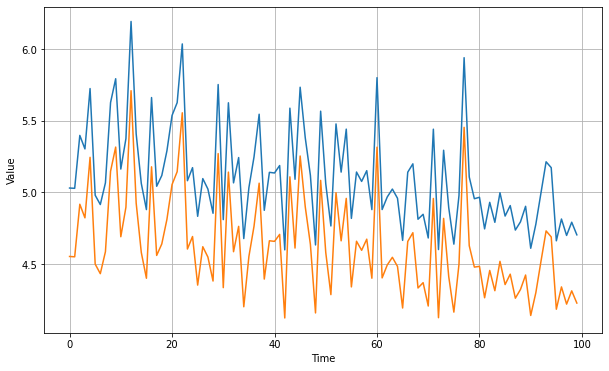

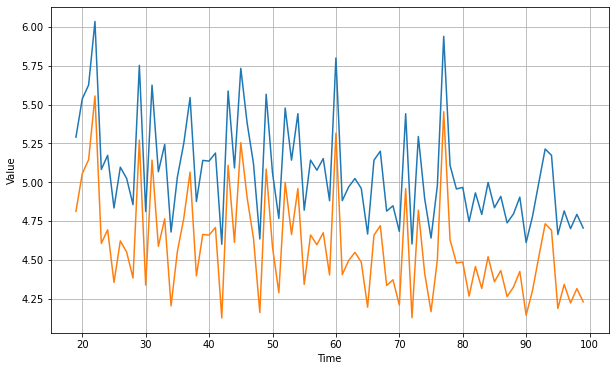

In [ ]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    epochs, 
    (mae, loss), 
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    epochs_zoom, 
    (mae_zoom, loss_zoom), 
    )

### Model Prediction

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    # Get predictions on the entire dataset
    forecast = model.predict(dataset)
    
    return forecast

29/29 [==============================] - 1s 4ms/step


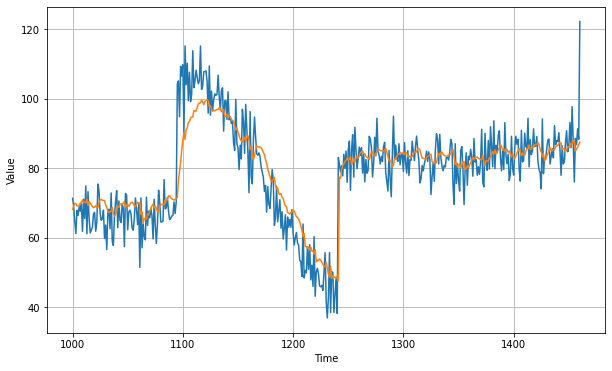

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
## Compute the MAE and MSE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

52.098446
5.363798


### Adding a Callback for Early Stopping

In [ ]:
# Generate data windows from the validation set
val_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [ ]:
# Uncomment if you want to reset the weights
# model.set_weights(init_weights)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when a certain metric is met

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the validation set MAE
    if(logs.get('val_mae') < 5.2):

      # Stop if threshold is met
      print("\nRequired val MAE is met so cancelling training!")
      self.model.stop_training = True

# Instantiate the class
callbacks = myCallback()

In [ ]:
# Set the learning rate
learning_rate = 1e-6

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(train_set, epochs=100, validation_data=val_set, callbacks=[callbacks])

Epoch 1/100
62/62 [==============================] - 78s 25ms/step - loss: 4.1123 - mae: 4.5876 - val_loss: 6.0849 - val_mae: 6.5661
Epoch 2/100
62/62 [==============================] - 1s 15ms/step - loss: 4.1964 - mae: 4.6679 - val_loss: 6.7760 - val_mae: 7.2614
Epoch 3/100
62/62 [==============================] - 1s 16ms/step - loss: 4.6990 - mae: 5.1807 - val_loss: 4.8842 - val_mae: 5.3653
Epoch 4/100
62/62 [==============================] - 1s 16ms/step - loss: 4.2569 - mae: 4.7323 - val_loss: 4.7805 - val_mae: 5.2575
Epoch 5/100
60/62 [============================>.] - ETA: 0s - loss: 4.2789 - mae: 4.7529
Required val MAE is met so cancelling training!
62/62 [==============================] - 1s 15ms/step - loss: 4.2682 - mae: 4.7427 - val_loss: 4.7083 - val_mae: 5.1883


29/29 [==============================] - 1s 5ms/step


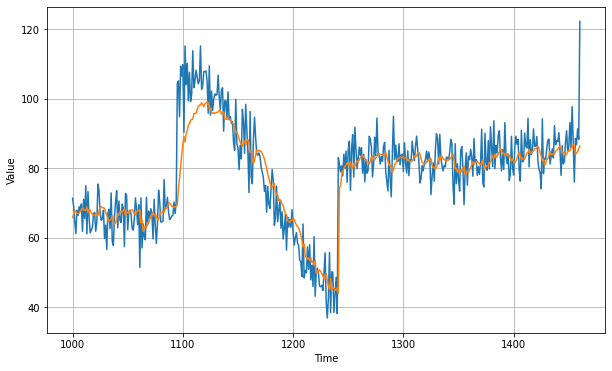

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [ ]:
## Compute the MAE and MSE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

50.327015
5.123827
